In [1]:
import findspark
findspark.init()
import os
import sys
spark_name = os.environ.get('SPARK_HOME',None)
if not spark_name:
    raise ValueErrorError('spark环境没有配置好')
sys.path.insert(0,os.path.join(spark_name,'python'))
sys.path.insert(0,os.path.join(spark_name,'D:\ProgramFiles\spark-3.3.0-bin-hadoop3\python\lib\py4j-0.10.9.5-src.zip'))

In [2]:
from pyspark.sql import SparkSession

In [3]:
#Creating the session
spark = SparkSession.builder.appName('taxi').getOrCreate()

In [4]:
from pyspark.sql.types import StringType, IntegerType, StructType, StructField, TimestampType, DoubleType

In [5]:
schema = StructType([StructField('VendorID', IntegerType(), True),
                    StructField('tpep_pickup_datetime', TimestampType(), True),
                    StructField('tpep_dropoff_datetime', TimestampType(), True),
                    StructField('passenger_count', IntegerType(), True),
                    StructField('trip_distance', DoubleType(), True),
                    StructField('RatecodeID', IntegerType(), True),
                    StructField('store_and_fwd_flag', StringType(), True),
                    StructField('PULocationID', IntegerType(), True),
                    StructField('DOLocationID', IntegerType(), True),
                    StructField('payment_type', IntegerType(), True),
                    StructField('fare_amount', DoubleType(), True),
                    StructField('extra', DoubleType(), True),
                    StructField('mta_tax', DoubleType(), True),
                    StructField('tip_amount', DoubleType(), True),
                    StructField('tolls_amount', IntegerType(), True),
                    StructField('improvement_surcharge', DoubleType(), True),
                    StructField('total_amount', DoubleType(), True),
                    StructField('congestion_surcharge', DoubleType(), True)])

In [6]:
df = spark.read.csv(r"taxi-data.csv", schema=schema, header=True)

In [7]:
df.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1| 2019-12-01 00:26:58|  2019-12-01 00:41:45|              1|          4.2|         1|                 N|         142|         116|           2|       14.5|  3.0|    0.5|       0.0|           0|                  0.3

In [8]:
df = df.dropna()

In [9]:
df.describe().show()

+-------+-------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+--------------------+---------------------+------------------+--------------------+
|summary|           VendorID|   passenger_count|    trip_distance|        RatecodeID|store_and_fwd_flag|     PULocationID|      DOLocationID|      payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|        tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|
+-------+-------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+--------------------+---------------------+------------------+--------------------+
|  count|            6461279|        

In [10]:
df.dtypes

[('VendorID', 'int'),
 ('tpep_pickup_datetime', 'timestamp'),
 ('tpep_dropoff_datetime', 'timestamp'),
 ('passenger_count', 'int'),
 ('trip_distance', 'double'),
 ('RatecodeID', 'int'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'int'),
 ('DOLocationID', 'int'),
 ('payment_type', 'int'),
 ('fare_amount', 'double'),
 ('extra', 'double'),
 ('mta_tax', 'double'),
 ('tip_amount', 'double'),
 ('tolls_amount', 'int'),
 ('improvement_surcharge', 'double'),
 ('total_amount', 'double'),
 ('congestion_surcharge', 'double')]

In [11]:
df = df.drop_duplicates()

In [12]:
df.where((df.total_amount < 0)).sort("total_amount").show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       2| 2019-12-18 12:48:52|  2019-12-20 13:34:47|              2|         1.62|         1|                 N|         193|         193|           3|    -1472.0|  0.0|   -0.5|       0.0|           0|                 -0.3

In [13]:
from pyspark.sql.functions import udf

In [14]:
df3=df.withColumn('total_amount',udf(lambda x: abs(x) if x < 0 else x,DoubleType())(df['total_amount']))

In [15]:
df3=df3.withColumn('congestion_surcharge',udf(lambda x: abs(x) if x < 0 else x,DoubleType())(df3['congestion_surcharge']))

In [16]:
df3=df3.withColumn('improvement_surcharge',udf(lambda x: abs(x) if x < 0 else x,DoubleType())(df3['improvement_surcharge']))

In [17]:
df3=df3.withColumn('tolls_amount',udf(lambda x: abs(x) if x < 0 else x,IntegerType())(df3['tolls_amount']))

In [18]:
df3=df3.withColumn('tip_amount',udf(lambda x: abs(x) if x < 0 else x,DoubleType())(df3['tip_amount']))

In [19]:
df3=df3.withColumn('mta_tax',udf(lambda x: abs(x) if x < 0 else x,DoubleType())(df3['mta_tax']))

In [20]:
df3=df3.withColumn('extra',udf(lambda x: abs(x) if x < 0 else x,DoubleType())(df3['extra']))

In [21]:
df3=df3.withColumn('fare_amount',udf(lambda x: abs(x) if x < 0 else x,DoubleType())(df3['fare_amount']))

In [22]:
df3.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       2| 2019-12-02 10:09:59|  2019-12-02 10:50:00|              2|        17.67|         3|                 N|         233|           1|           2|       69.5|  0.0|    0.0|       0.0|          18|                  0.3

In [23]:
df.where((df.trip_distance < 0)).show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       2| 2019-12-01 13:21:06|  2019-12-01 13:24:41|              1|        -2.29|         5|                 N|         124|         216|           2|      25.32|  0.0|    0.5|       0.0|           0|                  0.3

In [24]:
df4 = df3[(df3['tpep_pickup_datetime'] > '2019-12-01 00:00:00') & (df3['tpep_pickup_datetime'] < '2019-12-31 23:59:59')]

In [25]:
df4.count()

6460912

In [26]:
df4.dtypes

[('VendorID', 'int'),
 ('tpep_pickup_datetime', 'timestamp'),
 ('tpep_dropoff_datetime', 'timestamp'),
 ('passenger_count', 'int'),
 ('trip_distance', 'double'),
 ('RatecodeID', 'int'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'int'),
 ('DOLocationID', 'int'),
 ('payment_type', 'int'),
 ('fare_amount', 'double'),
 ('extra', 'double'),
 ('mta_tax', 'double'),
 ('tip_amount', 'double'),
 ('tolls_amount', 'int'),
 ('improvement_surcharge', 'double'),
 ('total_amount', 'double'),
 ('congestion_surcharge', 'double')]

In [27]:
import pyspark.sql.functions as F

In [28]:
df4 = df4.withColumn('day', F.dayofmonth(df.tpep_pickup_datetime))
df4 = df4.withColumn('week_day', F.dayofweek(df.tpep_pickup_datetime))
df4 = df4.withColumn('hour', F.hour(df.tpep_pickup_datetime))
df4 = df4.withColumn('date', df["tpep_pickup_datetime"].cast("date"))

In [29]:
df4.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---+--------+----+----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|day|week_day|hour|      date|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---+--------+----+----------+
|       2| 2019-12-02 10:09:59|  2019-12-02 10:50:00|              2|        17.67|         3|                 N|         233|          

In [30]:
df4 = df4.withColumn('duration', F.col("tpep_dropoff_datetime").cast("long") - F.col('tpep_pickup_datetime').cast("long"))

In [31]:
df4 = df4.withColumn('duration', F.col("duration") / 60)

In [32]:
df4.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---+--------+----+----------+-------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|day|week_day|hour|      date|           duration|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---+--------+----+----------+-------------------+
|       2| 2019-12-02 10:09:59|  2019-12-02 10:50:00|              2|       

In [33]:
df4[df4['duration'] <= 0].sort('duration').show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---+--------+----+----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|day|week_day|hour|      date|          duration|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---+--------+----+----------+------------------+
|       1| 2019-12-09 15:53:10|  2019-12-05 15:33:42|              1|          

In [34]:
df4 = df4.where((df4.duration > 0))

In [35]:
df4.select("duration").describe().show()

+-------+--------------------+
|summary|            duration|
+-------+--------------------+
|  count|             6456593|
|   mean|  16.919187975764103|
| stddev|   69.53194336468553|
|    min|0.016666666666666666|
|    max|   6114.783333333334|
+-------+--------------------+



In [36]:
df4.where((df4.duration < 3)).select("duration").describe().show()

+-------+--------------------+
|summary|            duration|
+-------+--------------------+
|  count|              330577|
|   mean|   1.894285597606609|
| stddev|  0.8967814585239657|
|    min|0.016666666666666666|
|    max|  2.9833333333333334|
+-------+--------------------+



In [37]:
too_short = df4.where((df4.duration < 3)).select("duration").toPandas()

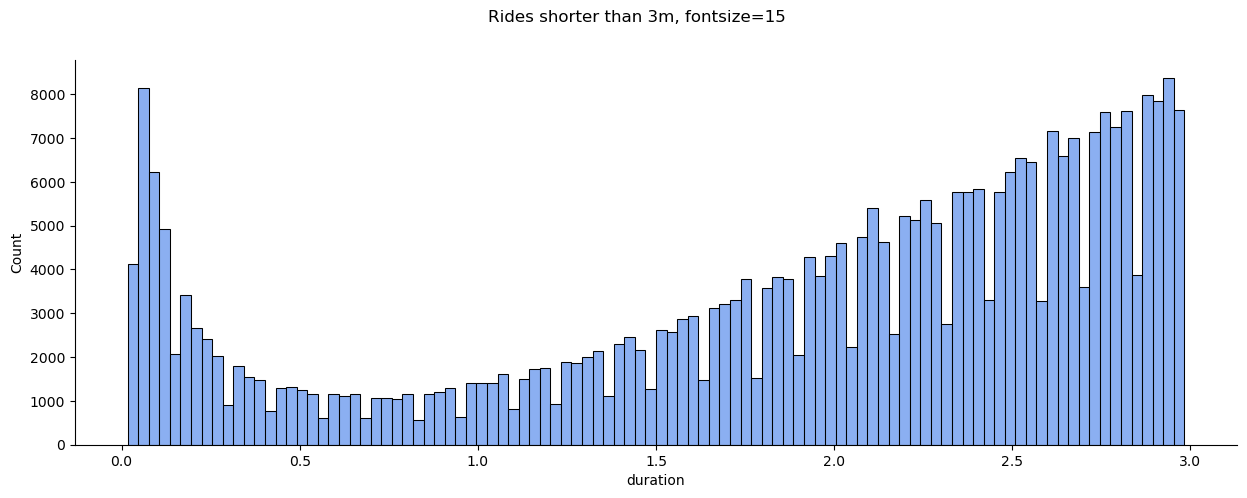

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(
    too_short['duration'],
    bins=100,
    color='cornflowerblue'
)
fig.suptitle('Rides shorter than 3m, fontsize=15')
sns.despine()
plt.show()

In [39]:
df4.where((df4.duration > 180)).select("duration").describe().show()

+-------+------------------+
|summary|          duration|
+-------+------------------+
|  count|             16582|
|   mean|1345.8785691311898|
| stddev|269.53505688431375|
|    min|180.16666666666666|
|    max| 6114.783333333334|
+-------+------------------+



In [40]:
too_long = df4.where((df4.duration > 180)).select("duration").toPandas()

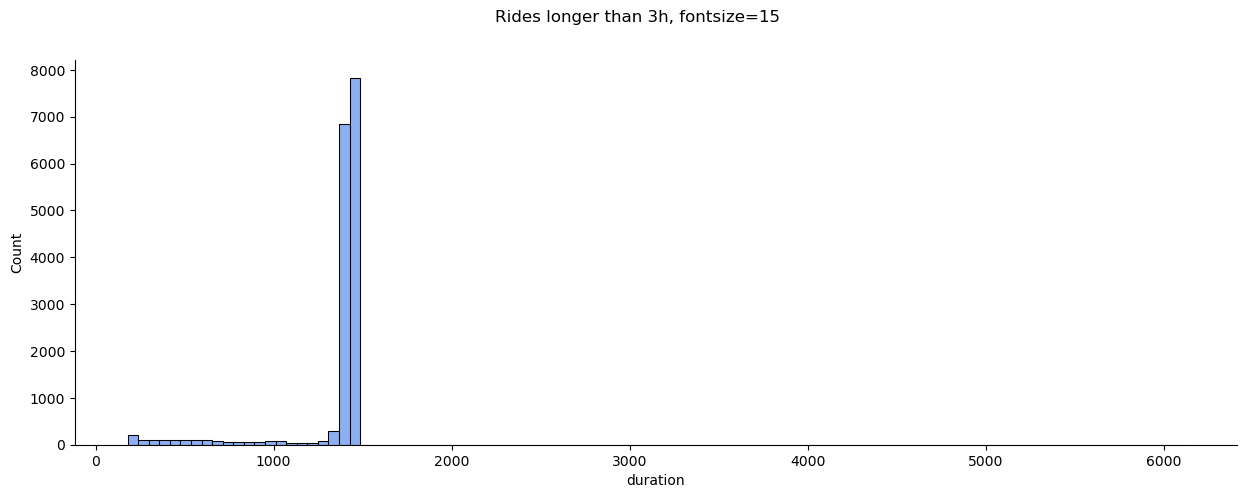

In [41]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(
    too_long['duration'],
    bins=100,
    color='cornflowerblue'
)
fig.suptitle('Rides longer than 3h, fontsize=15')
sns.despine()
plt.show()

In [42]:
df4 = df4.where((df4.duration < 240)&(df4.duration > 1))

In [43]:
passenger_count = df4.select("passenger_count").toPandas()

In [44]:
passenger_count.passenger_count.value_counts()

1    4470305
2     991256
3     280900
5     228428
4     151698
6     137607
0     116588
7         17
9          4
8          4
Name: passenger_count, dtype: int64

In [45]:
passenger_count[passenger_count['passenger_count'] != 0].passenger_count.median()

1.0

In [46]:
df4=df4.withColumn('passenger_count',udf(lambda x: 1 if x == 0 else x,IntegerType())(df4['passenger_count']))

In [47]:
passenger_count = df4.select("passenger_count").toPandas()

In [48]:
passenger_count.passenger_count.value_counts()

1    4586893
2     991256
3     280900
5     228428
4     151698
6     137607
7         17
9          4
8          4
Name: passenger_count, dtype: int64

In [49]:
df4.select("trip_distance").describe().show()

+-------+------------------+
|summary|     trip_distance|
+-------+------------------+
|  count|           6376807|
|   mean|2.3655707801726025|
| stddev| 8.047658055731802|
|    min|            -19.23|
|    max|          19130.18|
+-------+------------------+



In [50]:
df4.where((df4.trip_distance <= 0)).sort("trip_distance").show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---+--------+----+----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|day|week_day|hour|      date|          duration|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+---+--------+----+----------+------------------+
|       2| 2019-12-23 14:07:46|  2019-12-23 15:13:28|              1|       -19

In [51]:
df4 = df4.where((df4.trip_distance > 0))

In [52]:
df4 = df4[df4['fare_amount'] > 2.5]

In [53]:
df4.select("extra").describe().show()

+-------+------------------+
|summary|             extra|
+-------+------------------+
|  count|           6354107|
|   mean|1.1054101087690231|
| stddev| 1.225586784601284|
|    min|               0.0|
|    max|             87.56|
+-------+------------------+



In [54]:
df4 = df4[df4['extra'] < 5]

In [59]:
df4.coalesce(1).write.option("header", "true").csv("myFile.csv")